## Loss Function in Linear Regressions(tensorflow)

## Set up

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore")

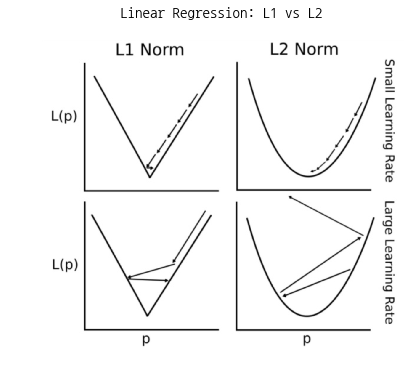

In [2]:
import matplotlib.image as mpimg

lr_image = mpimg.imread("../images/lr_tf.png")
plt.figure(figsize=(12, 6))
plt.imshow(lr_image)
plt.axis("off")
plt.title("Linear Regression: L1 vs L2")
plt.show()

L1 Loss for Linear Least Squares 공식은 다음과 같음  
$$S=\sum _{i=1}^{N} { \left| { y }_{i  }-\hat {y} _{i  } \right|  } $$  

N: data points의 수  
$y_{i}$: y의 실제 값  
$\hat {y}_{i}$: i번째 y의 예측 값  

iris데이터셋에 L1 Loss function을 사용하여 결과를 확인해보면 다음과 같음

## iris L1 Loss function

In [3]:
from sklearn.datasets import load_iris
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops

ops.reset_default_graph()
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
x_vals = iris.data[:, 3] # petal width
y_vals = iris.data[:, 0] # sepal length

### Hyper parameter 조정

In [6]:
batch_size = 25
lrn_rate = 0.1 # divergenc at 0.4
iterations = 100

In [7]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

with tf.Session() as sess:
    model_output = tf.add(tf.matmul(x_data, A), b)
    loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))
    my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate=lrn_rate)
    train_step_l1 = my_opt_l1.minimize(loss_l1)
    init = tf.global_variables_initializer()
    init.run()
    
    loss_vec_l1 = []
    for i in range(iterations):
        rnd_idx = np.random.choice(len(x_vals), size=batch_size)
        rnd_x = x_vals[rnd_idx].reshape(-1, 1)
        rnd_y = y_vals[rnd_idx].reshape(-1, 1)
        feed = {x_data:rnd_x, y_target:rnd_y}
        sess.run(train_step_l1, feed_dict=feed)
        temp_loss_l1 = sess.run(loss_l1, feed_dict=feed)
        loss_vec_l1.append(temp_loss_l1)

        if (i+1)%10 == 0:
            print('Step {}: A={}, b={}'.format(i+1, A.eval(), b.eval()))

Instructions for updating:
Colocations handled automatically by placer.
Step 10: A=[[1.4660357]], b=[[1.2985425]]
Step 20: A=[[2.2796357]], b=[[2.1305428]]
Step 30: A=[[2.3268354]], b=[[2.5625427]]
Step 40: A=[[2.1172354]], b=[[2.8265426]]
Step 50: A=[[1.9976355]], b=[[3.1625423]]
Step 60: A=[[1.8364356]], b=[[3.4585423]]
Step 70: A=[[1.6432357]], b=[[3.6825426]]
Step 80: A=[[1.4360358]], b=[[3.9225426]]
Step 90: A=[[1.2144358]], b=[[4.1305423]]
Step 100: A=[[1.1268358]], b=[[4.298542]]


L2 Loss for Linear Least Squares는 다음과 같음

$$S=\sum _{i=1}^{N} { \left( { y }_{i  }-\hat {y} _{i  } \right)^{2}  } $$  

N: data points의 수  
$y_{i}$: y의 실제 값  
$\hat {y}_{i}$: i번째 y의 예측 값  

iris데이터에 L2 Loss function을 사용한 예

## iris L2 Loss function

### setting variable

In [8]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [9]:
with tf.Session() as sess:
    fomula = tf.add(tf.matmul(x_data, A), b)
    loss_l2 = tf.reduce_mean(tf.square(y_target - fomula))
    opt = tf.train.GradientDescentOptimizer(lrn_rate)
    train_step_l2 = opt.minimize(loss_l2)
    init = tf.global_variables_initializer()
    init.run()

    loss_vec_l2 = []
    for i in range(iterations):
        rand_idx = np.random.choice(len(x_vals), size=batch_size)
        rand_x = x_vals[rand_idx].reshape(-1, 1)
        rand_y = y_vals[rand_idx].reshape(-1, 1)
        my_dict = {x_data:rand_x, y_target:rand_y}
        sess.run(train_step_l2, feed_dict=my_dict)
        temp_loss_l2 = sess.run(loss_l2, feed_dict=my_dict)
        loss_vec_l2.append(temp_loss_l2)

        if (i+1)%20 == 0:
            print('step {}: A={}, b={}'.format(i+1, A.eval()[0], b.eval()[0]))

step 20: A=[1.106271], b=[4.369687]
step 40: A=[0.9734361], b=[4.6361465]
step 60: A=[0.904249], b=[4.690876]
step 80: A=[0.8871237], b=[4.7517896]
step 100: A=[0.9441615], b=[4.7697663]


L1 Loss function과 L2 Loss function을 시각화하면 둘의 차이를 명확히 알 수 있음

## Visualization

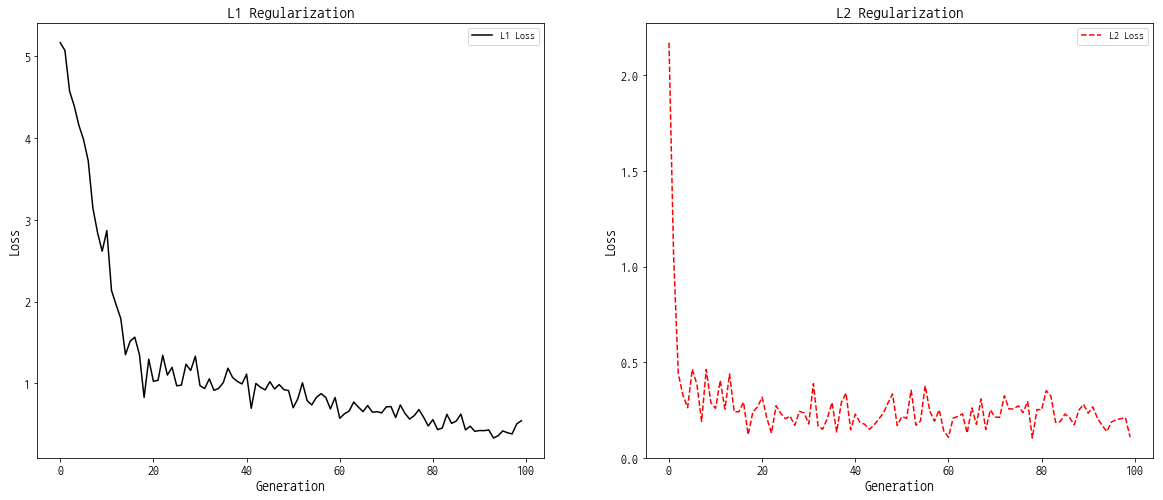

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.title('L1 and L2 Loss per Generation, learning rate={}'.format(lrn_rate))
plt.subplot(121)
plt.plot(loss_vec_l1, c='k', label='L1 Loss')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc=1)
plt.title("L1 Regularization")

plt.subplot(122)
plt.plot(loss_vec_l2, c='red', ls='--', label='L2 Loss')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc=1)
plt.title("L2 Regularization")

plt.show()